In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import torch.nn as nn
from torch.utils import data
import sys
sys.path.append("..")

In [2]:
num_train,num_test,num_inputs=7000,3000,500

In [3]:
true_w, true_b = torch.ones(num_inputs,1)*0.0056,0.0028

In [4]:
features = torch.randn(num_train+num_test,num_inputs)
labels = torch.matmul(features,true_w)+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [5]:
train_features,test_features = features[:num_train,:],features[num_train:,:]

In [6]:
train_labels,test_labels=labels[:num_train],labels[num_train:]

In [7]:
def init_params():
    w=torch.randn((num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]

In [8]:
def squared_loss(y_hat,y):
    return ((y_hat-y.view(y_hat.size()))**2)/2

In [9]:
def SGD(params,lr):
    for param in params:
        param.data-=lr*param.grad

In [10]:
def linear(X,w,b):
    return torch.mm(X,w)+b

In [29]:
batch_size,num_epochs,lr=1,30,0.0001

In [13]:
net,loss=linear,squared_loss

In [14]:
dataset=torch.utils.data.TensorDataset(train_features,train_labels)
train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

In [15]:
def Draw_Loss_Curve(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize']=figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)

In [36]:
def fit_and_plot():
    w,b=init_params()
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X,w,b),y)
            l=l.sum()
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            SGD([w,b],lr)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().item())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().item())
    Draw_Loss_Curve(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])
    return w,b

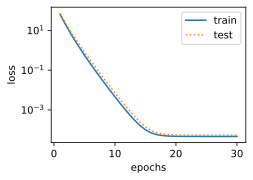

In [37]:
w,b=fit_and_plot()

In [42]:
print("w is:",w.mean().item(),"b is:",b.mean().item())

w is: 0.005594759713858366 b is: 0.002639364218339324
